In [1]:
type_path = "E:\Economy"

In [23]:
import os
import pandas as pd
import numpy as np
from statistics import mean

In [4]:
adventurer_data = {
    "Brawler": {},
    "Mage": {},
    "Swordsman": {}
}

In [5]:
level_cap = 5

In [13]:
for key in adventurer_data:
    adventurer_data[key] = [[], [], [], [], []]
    print(adventurer_data[key])

[[], [], [], [], []]
[[], [], [], [], []]
[[], [], [], [], []]


In [21]:
for filename in os.listdir(type_path):
    file_path = os.path.join(type_path, filename)
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        adventurer_type = filename.split('_')[0]
        for i in range(len(df)):
            level = df.loc[i, 'Level']
            max_steps = df.loc[i, 'MaxCount']
            adventurer_data[adventurer_type][level].append(max_steps)

In [26]:
graph_data = { }
for key in adventurer_data:
    graph_data[key] = [[], [], [], [], []]
    for x in range(level_cap):
        graph_data[key][x] = mean(adventurer_data[key][x])

In [28]:
print(graph_data)

{'Brawler': [25426, 28510, 38858, 25426, 29785.428571428572], 'Mage': [21701, 23162, 33713, 21701, 25221.027027027027], 'Swordsman': [16889, 18388, 25106, 16889, 19488.4358974359]}


In [29]:
import matplotlib.pyplot as plt

In [30]:
%matplotlib inline

In [31]:
keys = graph_data.keys()

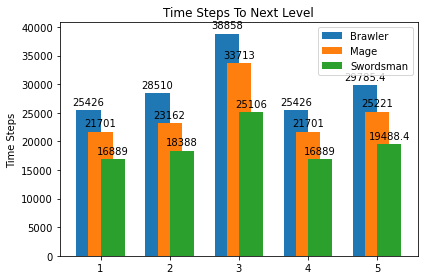

In [47]:
labels = ['1', '2', '3', '4', '5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, graph_data["Brawler"], width, label="Brawler")
rects2 = ax.bar(x, graph_data["Mage"], width, label="Mage")
rects3 = ax.bar(x + width/2, graph_data["Swordsman"], width, label="Swordsman")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time Steps')
ax.set_title('Time Steps To Next Level')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()